In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
img = cv2.imread('/home/q/casey/BigDataSystem/week9/img_8k.jpg')

In [2]:
print(img.shape)

(4841, 7254, 3)


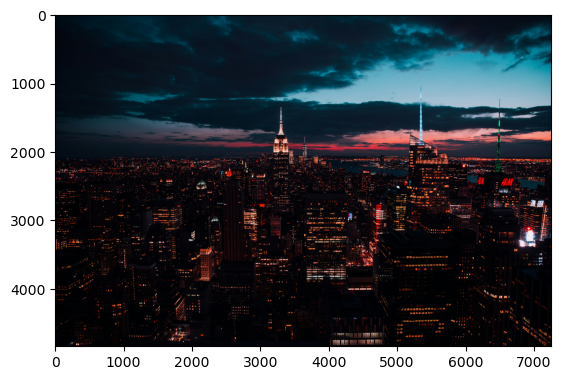

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [4]:
img_up = cv2.resize(img, dsize=(img.shape[1]*2, img.shape[0]*2), interpolation=cv2.INTER_CUBIC)
print(img_up.shape)

(9682, 14508, 3)


In [7]:
# 0.21 R + 0.72 G + 0.07 B

gray = 0.21 * img_up[:,:,0] + 0.72 * img_up[:,:,1] + 0.07 * img_up[:,:,2]


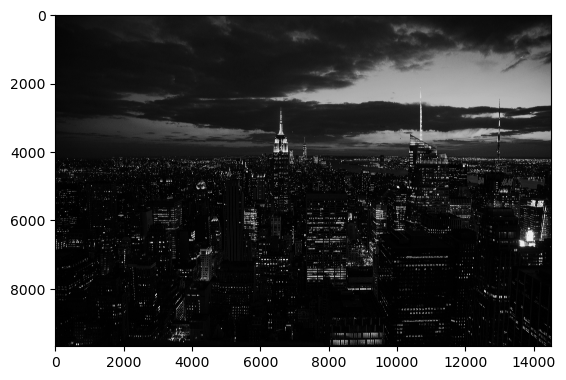

In [8]:
plt.imshow(gray, cmap='gray')
plt.show()

In [9]:
!nvidia-smi

Thu May  1 16:02:14 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti     Off | 00000000:02:00.0  On |                  N/A |
|  0%   48C    P8              15W / 200W |   3638MiB /  8192MiB |      8%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [19]:
import gc
import cupy as cp

# 모든 CuPy ndarray 삭제
for obj in gc.get_objects():
    try:
        if isinstance(obj, cp.ndarray):
            del obj
    except:
        pass

# CuPy 메모리 풀 해제
cp.get_default_memory_pool().free_all_blocks()
cp.get_default_pinned_memory_pool().free_all_blocks()

print("CuPy 메모리 해제 완료")


CuPy 메모리 해제 완료


In [20]:
import cupy as cp
img_gpu = cp.asarray(img_up)

In [21]:
gray_gpu = 0.21 * img_gpu[:,:,0] + 0.72 * img_gpu[:,:,1] + 0.07 * img_gpu[:,:,2]
plt.imshow(gray_gpu, cmap = 'gray')
plt.show()

OutOfMemoryError: Out of memory allocating 1,123,731,968 bytes (allocated so far: 3,792,595,456 bytes).